## Práctica 02, Reporte 01
## Daniel Ramírez Umaña
## 13 Septiembre 2021

## How to Perform Data Cleaning for Machine Learning with Python

La limpieza de datos en el proceso de aplicación de aprendizaje automático es muy necesario ya que al omitirse, los modelos de clasificación pueden romperse o informar de resultados de rendimiento demasiado optimistas.

### 1. Conjuntos de Datos Desordenados (Messy Datasets)

La limpieza de datos se refiere a la identificación y corrección de errores en el conjunto de datos que pueden afectar negativamente a un modelo predictivo. Esta requiere además de una aplicación de distintas técnicas, de tener un buen conocimiento del conjunto de datos.

### 2. Identificar las Columnas que Contienen un Solo Valor

Cuando una columna solo posee una única observación o valor, es muy probablemente una columna inútil. A estas columnas o predictores se les denominan **predictores de varianza cero** (zero-variance predictors) ya que al ser el mismo valor, su varianza sería cero.

In [1]:
# resume el número de valores únicos para cada columna usando numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
# definir la ubicación del conjunto de dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# cargar el dataset
data = loadtxt(urlopen(path), delimiter=',')
# resumir el número de valores únicos en cada columna
for i in range(data.shape[1]):
	print(i, len(unique(data[:, i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


Como podemos ver la variable en el índice 22 tiene un único valor y debería ser removido

Ahora el mismo trbajo pero usando Pandas

In [2]:
# summarize the number of unique values for each column using numpy
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
# summarize the number of unique values in each column
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


### 3. Eliminar Columnas que Contienen un Solo Valor

Las variables o columnas que contienen un único valor deberían probablemente ser eliminadas. Esto puede ser muy fácil al usar la función `drop()` en el DataFrame de Pandas

In [3]:
# eliminar columnas con un valor único
from pandas import read_csv
# ubicación del dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
print(df.shape)
# obtiene el valor de valores únicos en cada columna
counts = df.nunique()
# columnas de registro a eliminar
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# eliminar columnas inútiles
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[22]
(937, 49)


### 4. Considerar las Columnas que Tienen Muy Pocos Valores

Que columnas tengan muy pocos valores únicos pueden tener sentido si estas son variables ordinales o categóricas, pero en caso de variables numéricas podría resultar sospechoso que solo hayan 2, 4 o 9 valores numéricos únicos. A estos los definimos como **predictores de varianza cercana a cero** (near-zero variance predictors). Estas podrían o no contribuir a la habilidad del modelo.

No es recomendable asumir que este tipo de variables son útiles para el modelo, además que estas podrían inferir en errores en los modelos o bien resultados inesperados.

Para tomar una desición on respecto a estas variables, podemos calcular calcular el porcentaje del número total de filas del conjunto de datos.

In [4]:
# resumir el porcentaje de valores únicos para cada columna utilizando numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
# ubicación dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# cargar el dataset
data = loadtxt(urlopen(path), delimiter=',')
# resumir el número de valores únicos en cada columna
for i in range(data.shape[1]):
	num = len(unique(data[:, i]))
	percentage = float(num) / data.shape[0] * 100
	print('%d, %d, %.1f%%' % (i, num, percentage))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


Podemos ver que algunas variables tienen un porcentaje por debajo de 1%.

Veamos solo aquellos que tienen un porcentaje por debajo de 1%.

In [5]:
# summarize the percentage of unique values for each column using numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
data = loadtxt(urlopen(path), delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
	num = len(unique(data[:, i]))
	percentage = float(num) / data.shape[0] * 100
	if percentage < 1:
		print('%d, %d, %.1f%%' % (i, num, percentage))

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


No significa que estas columnas deban ser eliminadas, pero sí que requieren más atención. Por ejemplo:
* ¿Estos valores únicos pueden considerarse como valores ordinales?
* ¿Estos valores únicos pueden considerarse como valores categóricos?
* ¿Podría compararse la habilidad del modelo con cada variable eliminada de conjunto de datos?

Si queremos eliminar todas las columnas con porcentajes por debajo de 1% podríamos hecer lo siguiente:

In [6]:
# delete columns where number of unique values is less than 1% of the rows
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


### 5. Eliminar las Columnas que Tienen Una Variaza Baja

También podría ser interesante considerar que para eliminar columnas con pocos valores únicos podríamos calcular la varianza de una columna.

Existe la clase **VarianceThreshold** de la biblioteca **scikit-learn** que permite crear una instancia de la clase especificando el argumento "threshold", que por defecto es 0,0 para eliminar las columnas con valor único.

También con `fit_transform()` podemos crear un conjunto con las variables menores al umbral eliminadas.

In [10]:
# ejemplo de aplicar la varianza threshold
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
# ubicación del dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# cargar el dataset
df = read_csv(path, header=None)
# dividir datos en entradas y salidas
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# definir el transform
transform = VarianceThreshold()
# transformar los dalos de entrada
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


Podemos definir una secuencia de umbrales de 0,0 a 0,5 con un tamaño de paso de 0,05, por ejemplo, 0,0, 0,05, 0,1, etc.

(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


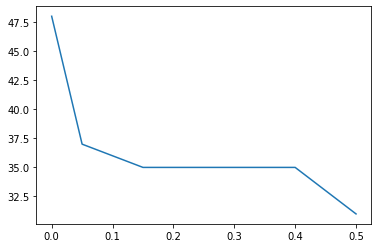

In [12]:
# explore the effect of the variance thresholds on the number of selected features
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
	# define the transform
	transform = VarianceThreshold(threshold=t)
	# transform the input data
	X_sel = transform.fit_transform(X)
	# determine the number of input features
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (t, n_features))
	# store the result
	results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

Podemos ver que a pesar que entre 0.15 y 0.4 hay una cantidad muy pequeña, un total de 14 columnas fueron eliminadas.

### 6. Identificar las Filas que Contienen Datos Duplicados

Filas que contienen datos idénticos (donde cada valor de cada columna es el mismo) son probablemente inútiles.

Gracias a la función de pandas `duplicated()` podemos saber cuando una fila está duplicada o no. Este consiste en una función que devuelve un valor buleano.

In [13]:
# locate rows of duplicate data
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
# load the dataset
df = read_csv(path, header=None)
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

True
       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


### 7. Eliminar Filas que Contienen Datos Duplicados

Es probable que se deban eliminar columnas del dataset antes de la modelización con el conjunto.

Entre las distintas formas para hacer esto, podemos usar la función de pandas `drop_duplicates()`.

In [14]:
# delete rows of duplicate data from the dataset
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
# load the dataset
df = read_csv(path, header=None)
print(df.shape)
# delete duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(150, 5)
(147, 5)


### Lo aprendido y el posible uso en mi futuro profesional:

Este material me permitió poder hacer uso de distintas funciones para eliminar columnas y filas que podrían no aportar o aportar muy poco a mis modelos además de que podrían generar errores o conflictos en estos por lo que podría ser de gran utilidad eliminarlos.

En mi futuro profesional esto será muy importante no solo para reducir tiempo y recursos en los entrenamientos de mis modelos, sino también para evitar que estos tengan errores inducidos.

### Aspectos de los que me gustaría saber más o que no me quedaron muy claros:


Me gustaría tener más ejemplos para ver como se comportan estas prácticas con distintos conjuntos, pero bien esto será algo que iré aprendiendo con el tiempo.